In [106]:
# Undergrad Project
import pandas as pd

# Get summary statistics

# Import data
df = pd.read_csv ('~/blue_zoo4926/share/health_data/SVI2020_US.csv')

# Get the general information + visuals
print(df.describe())

                 ST        STCNTY          FIPS     AREA_SQMI      E_TOTPOP  \
count  84122.000000  84122.000000  8.412200e+04  84122.000000  84122.000000   
mean      27.780272  27868.041761  2.786829e+10     41.998960   3882.091581   
std       15.911845  15937.596481  1.593761e+10    503.541937   1657.514889   
min        1.000000   1001.000000  1.001020e+09      0.000000      0.000000   
25%       12.000000  12119.000000  1.211991e+10      0.666885   2704.000000   
50%       27.000000  27145.000000  2.714501e+10      1.760608   3727.000000   
75%       41.000000  41067.000000  4.106703e+10     11.225403   4888.000000   
max       56.000000  56045.000000  5.604595e+10  85554.705262  39373.000000   

           M_TOTPOP          E_HU          M_HU          E_HH          M_HH  \
count  84122.000000  84122.000000  84122.000000  84122.000000  84122.000000   
mean     555.031645   1645.618875    193.050510   1454.485378    195.555586   
std      295.956808    672.645603     93.061605    

In [107]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import plotnine as pn

In [108]:
df=df[df != -999]

In [109]:
df.shape

(84122, 158)

In [110]:
df =df.dropna()

In [111]:
y = (df["RPL_THEMES"])
df.drop(["SPL_THEMES", "SPL_THEME2", "SPL_THEME1", "SPL_THEME4", "SPL_THEME3"],axis=1, inplace=True)
df.drop(["RPL_THEMES", "RPL_THEME1", "RPL_THEME2", "RPL_THEME3", "RPL_THEME4"],axis=1, inplace=True)
df.drop(["F_NOVEH", "F_TOTAL", "F_THEME4", "F_THEME1", "F_THEME2", "F_THEME3"],axis=1, inplace=True)
df.drop(["ST", "STATE", "ST_ABBR", "STCNTY", "COUNTY", "FIPS", "LOCATION", "AREA_SQMI"],axis=1, inplace=True)


In [112]:
df

E_TOTPOP  M_TOTPOP  E_HU  M_HU  E_HH  M_HH  E_POV150  M_POV150  \
0          1941       390   710   120   693   121       352       138   
1          1757       310   720    99   573    99       384       182   
2          3694       570  1464   180  1351   173       842       317   
3          3539       500  1741   200  1636   213       503       213   
4          4306       662  1786   220  1706   244       903       496   
...         ...       ...   ...   ...   ...   ...       ...       ...   
84117      3124       198  1532   142  1333   119       510       175   
84118      2231       273  1187   131  1053   154       265       134   
84119      2578       314  1142   124  1051   135       709       297   
84120      3276       280  1587   128  1386   138       777       280   
84121      3666       280  1984   134  1496   187       539       279   

       E_UNEMP  M_UNEMP  ...  EP_ASIAN  MP_ASIAN  EP_AIAN  MP_AIAN  EP_NHPI  \
0           18       18  ...       2.1       2.7      0.0      1.8      0.0   
1           29       26  ...       0.0       2.0      0.0      2.0      0.0   
2           53       45  ...       1.2       1.1      0.0      0.9      0.0   
3           39       34  ...       0.5       0.6      0.3      0.5      0.0   
4           23       31  ...       1.9       2.0      0.0      0.8      0.0   
...        ...      ...  ...       ...       ...      ...      ...      ...   
84117       50       34  ...       0.0       1.1      0.1      0.1      0.0   
84118       31       29  ...       0.0       1.6      0.1      0.3      0.0   
84119       89       67  ...       0.0       1.3      0.9      1.2      0.0   
84120       42       39  ...       2.0       2.8      0.1      0.1      0.0   
84121       76       58  ...       1.3       2.0      1.0      1.8      3.2   

       MP_NHPI  EP_TWOMORE  MP_TWOMORE  EP_OTHERRACE  MP_OTHERRACE  
0          1.8         6.6         5.1           0.0           1.8  
1          2.0         2.6         3.0           0.8           1.1  
2          0.9         1.8         2.3           0.0           0.9  
3          1.0         2.9         2.8           0.0           1.0  
4          0.8         0.3         0.6           0.0           0.8  
...        ...         ...         ...           ...           ...  
84117      1.1         1.6         1.8           0.0           1.1  
84118      1.6         5.6         3.8           1.4           1.5  
84119      1.3         2.9         3.5           0.0           1.3  
84120      1.1         6.1         4.1           0.0           1.1  
84121      3.7         0.0         0.9           0.0           0.9  

[83331 rows x 134 columns]

In [113]:
kf = KFold(n_splits=5)
def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

In [114]:
X=df

In [120]:
model = Lasso(alpha=0.0001, normalize=True)  # Remember alpha is our lambda; Try different values here!
model.fit(X, y)
print(model.coef_)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
cv_r2 = res.mean()
print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)

/apps/python/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.25056215e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

/apps/python/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
/apps/python/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

c-v R^2: 0.91914090013451 c-v MSE: 0.006678531432392235


In [121]:
print(model.coef_)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.25056215e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [122]:
X.columns

Index(['E_TOTPOP', 'M_TOTPOP', 'E_HU', 'M_HU', 'E_HH', 'M_HH', 'E_POV150',
       'M_POV150', 'E_UNEMP', 'M_UNEMP',
       ...
       'EP_ASIAN', 'MP_ASIAN', 'EP_AIAN', 'MP_AIAN', 'EP_NHPI', 'MP_NHPI',
       'EP_TWOMORE', 'MP_TWOMORE', 'EP_OTHERRACE', 'MP_OTHERRACE'],
      dtype='object', length=134)

In [123]:
factors= zip(X.columns, model.coef_)

In [124]:
list(factors)

[('E_TOTPOP', 0.0),
 ('M_TOTPOP', 0.0),
 ('E_HU', 0.0),
 ('M_HU', 0.0),
 ('E_HH', 0.0),
 ('M_HH', 0.0),
 ('E_POV150', 0.0),
 ('M_POV150', 0.0),
 ('E_UNEMP', 0.0),
 ('M_UNEMP', 0.0),
 ('E_HBURD', 0.0),
 ('M_HBURD', 0.0),
 ('E_NOHSDP', 0.0),
 ('M_NOHSDP', 0.0),
 ('E_UNINSUR', 0.0),
 ('M_UNINSUR', 0.0),
 ('E_AGE65', 0.0),
 ('M_AGE65', 0.0),
 ('E_AGE17', 0.0),
 ('M_AGE17', 0.0),
 ('E_DISABL', 3.2505621473454377e-06),
 ('M_DISABL', 0.0),
 ('E_SNGPNT', 0.0),
 ('M_SNGPNT', 0.0),
 ('E_LIMENG', 0.0),
 ('M_LIMENG', 0.0),
 ('E_MINRTY', 0.0),
 ('M_MINRTY', 0.0),
 ('E_MUNIT', 0.0),
 ('M_MUNIT', 0.0),
 ('E_MOBILE', 0.0),
 ('M_MOBILE', 0.0),
 ('E_CROWD', 0.0),
 ('M_CROWD', 0.0),
 ('E_NOVEH', 0.0),
 ('M_NOVEH', 0.0),
 ('E_GROUPQ', -0.0),
 ('M_GROUPQ', 0.0),
 ('EP_POV150', 0.0),
 ('MP_POV150', 0.0),
 ('EP_UNEMP', 0.0),
 ('MP_UNEMP', 0.0),
 ('EP_HBURD', 0.0),
 ('MP_HBURD', -0.0),
 ('EP_NOHSDP', 0.0),
 ('MP_NOHSDP', 0.0),
 ('EP_UNINSUR', 0.0),
 ('MP_UNINSUR', 0.0),
 ('EP_AGE65', 0.0),
 ('MP_AGE65', 0.0),

In [ ]:
EPL_NOVEH

<AxesSubplot:xlabel='EPL_NOVEH', ylabel='RPL_THEMES'>

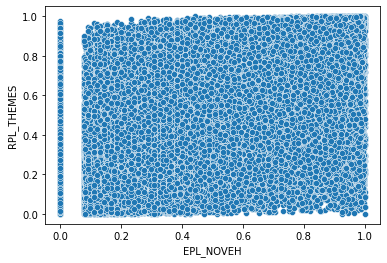

In [125]:
# Make seaborn plots bigger
import seaborn as sns
sns.scatterplot(x = df.EPL_NOVEH, y = y )

In [85]:
df.EPL_NOVEH,

(0        0.1872
 1        0.7387
 2        0.3651
 3        0.4731
 4        0.3173
           ...  
 84117    0.4006
 84118    0.5093
 84119    0.4952
 84120    0.3075
 84121    0.2429
 Name: EPL_NOVEH, Length: 84122, dtype: float64,)

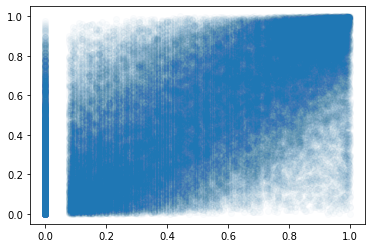

In [127]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(df.EPL_NOVEH, y, alpha=0.02)

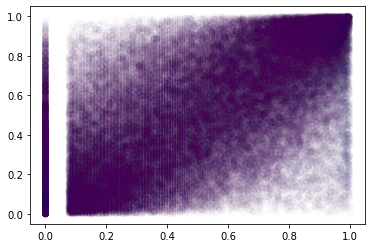

In [139]:
plt.scatter(df.EPL_NOVEH, y, alpha=0.02, c=df.EP_ASIAN*10000)

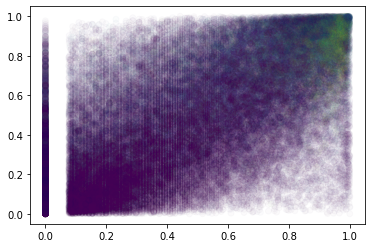

In [140]:
plt.scatter(df.EPL_NOVEH, y, alpha=0.02, c=df.EP_AFAM)

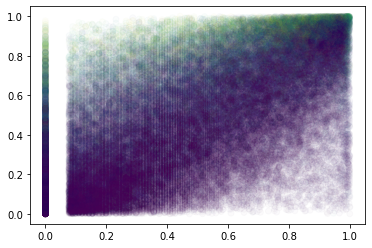

In [142]:
plt.scatter(df.EPL_NOVEH, y, alpha=0.02, c=df.EP_HISP)

/apps/python/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


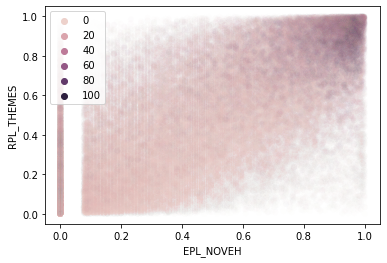

In [152]:
sns.scatterplot(df.EPL_NOVEH, y, alpha=0.02, hue = df.EP_AFAM )
plt.legend(loc = 'upper left')

/apps/python/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


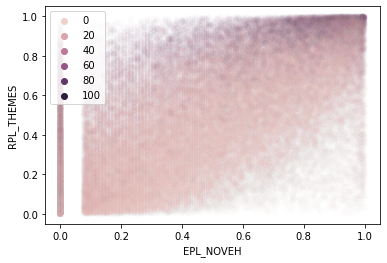

In [151]:
sns.scatterplot(df.EPL_NOVEH, y, alpha=0.02, hue = df.EP_HISP)
plt.legend(loc = 'upper left')

/apps/python/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


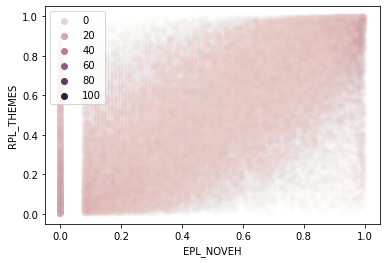

In [150]:
sns.scatterplot(df.EPL_NOVEH, y, alpha=0.02, hue = df.EP_ASIAN)
plt.legend(loc = 'upper left')

In [88]:
df.EPL_NOVEH.min()

-999.0

In [15]:
print(df.columns)

Index(['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION',
       'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP',
       ...
       'EP_ASIAN', 'MP_ASIAN', 'EP_AIAN', 'MP_AIAN', 'EP_NHPI', 'MP_NHPI',
       'EP_TWOMORE', 'MP_TWOMORE', 'EP_OTHERRACE', 'MP_OTHERRACE'],
      dtype='object', length=158)


<AxesSubplot:xlabel='E_POV150', ylabel='E_UNINSUR'>

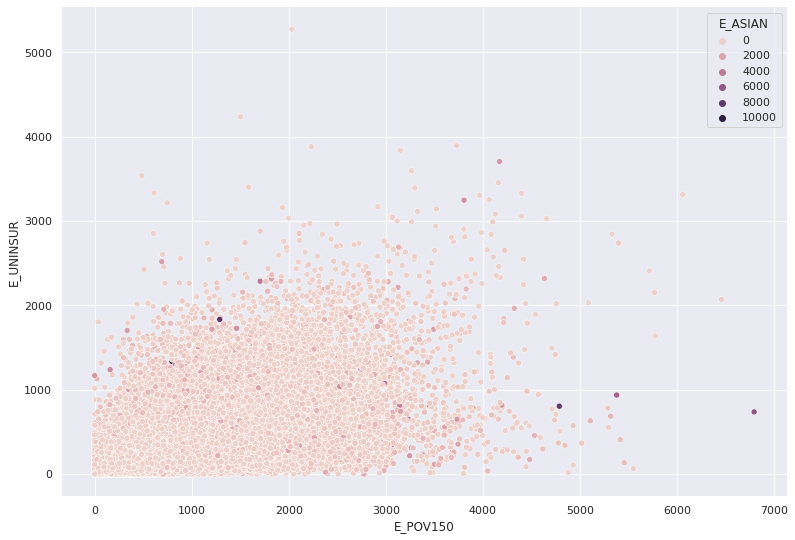

In [27]:
# Make seaborn plots bigger
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)
    
setPlt()
sns.scatterplot(x = 'E_POV150', y = 'E_UNINSUR' , hue = 'E_ASIAN', data = df )

<AxesSubplot:xlabel='E_POV150', ylabel='E_UNINSUR'>

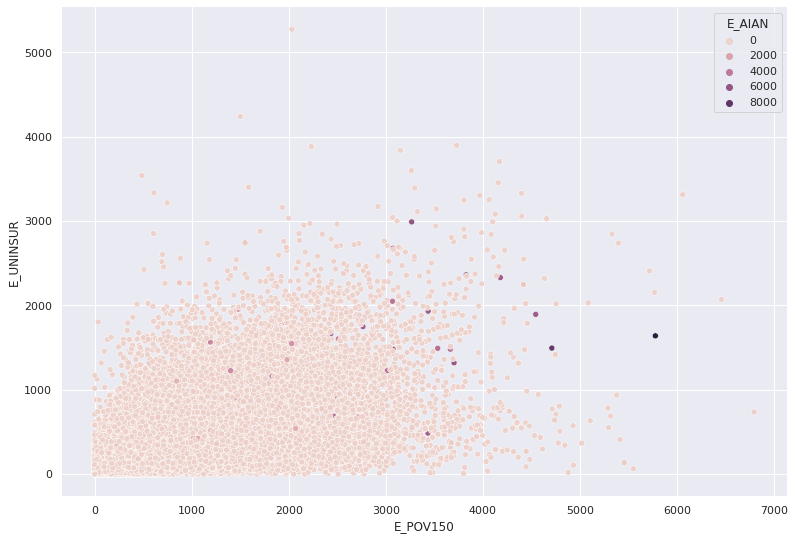

In [28]:
# Make seaborn plots bigger
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)
    
setPlt()
sns.scatterplot(x = 'E_POV150', y = 'E_UNINSUR' , hue = 'E_AIAN', data = df )

<AxesSubplot:xlabel='E_POV150', ylabel='E_UNINSUR'>

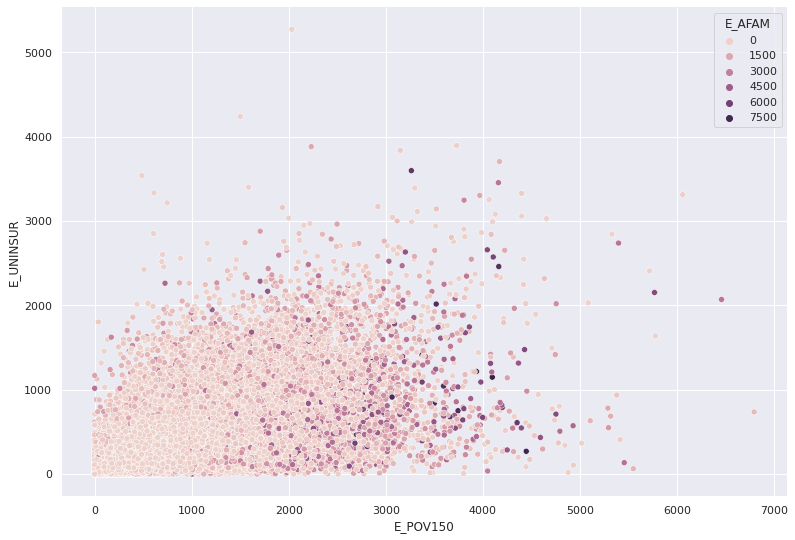

In [29]:
# Make seaborn plots bigger
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)
    
setPlt()
sns.scatterplot(x = 'E_POV150', y = 'E_UNINSUR' , hue = 'E_AFAM', data = df )

<AxesSubplot:xlabel='E_POV150', ylabel='E_UNINSUR'>

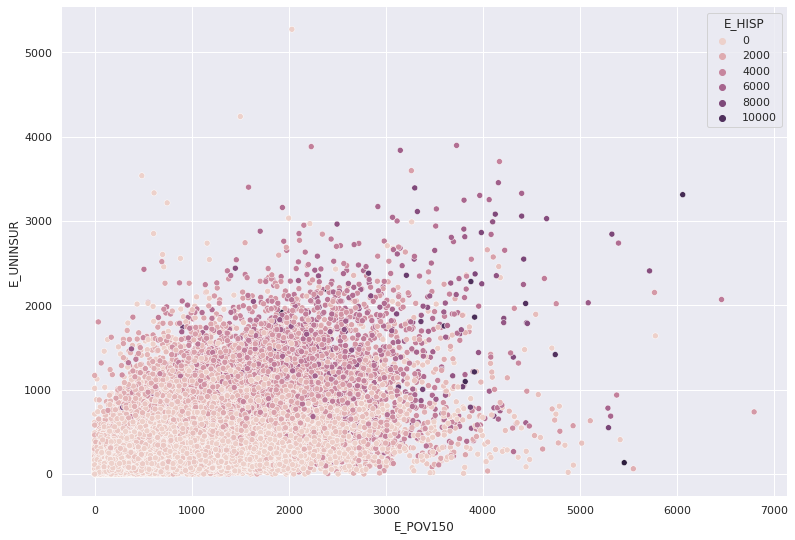

In [30]:
# Make seaborn plots bigger
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)
    
setPlt()
sns.scatterplot(x = 'E_POV150', y = 'E_UNINSUR' , hue = 'E_HISP', data = df )

In [16]:
import plotnine as pn

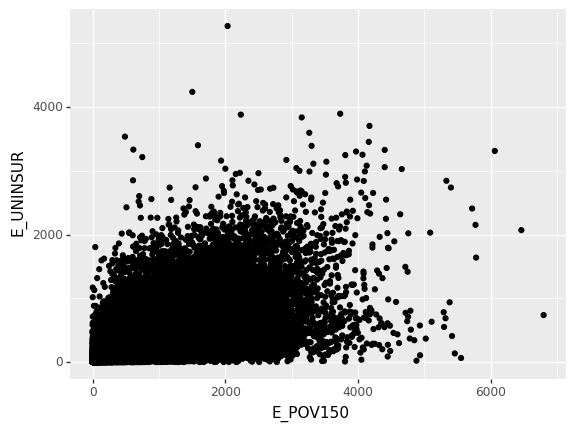

<ggplot: (2982779322786)>

In [17]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR')) + pn.geom_point()

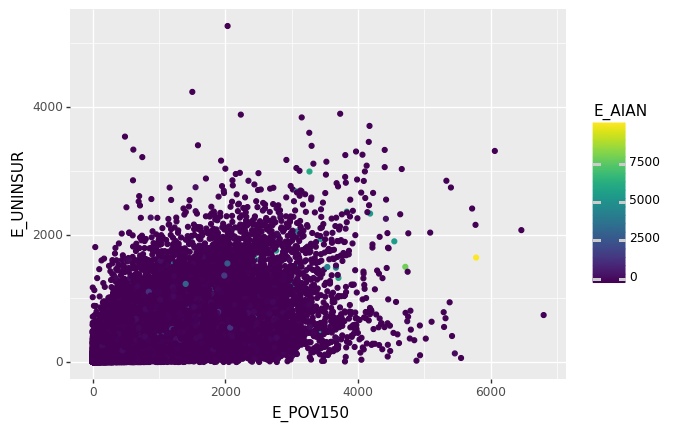

<ggplot: (2982706653716)>

In [19]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR', color='E_AIAN')) + pn.geom_point()

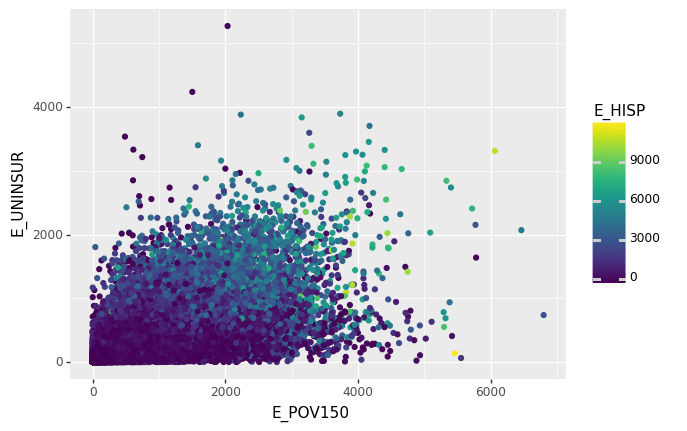

<ggplot: (2982678599044)>

In [20]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR', color='E_HISP')) + pn.geom_point()

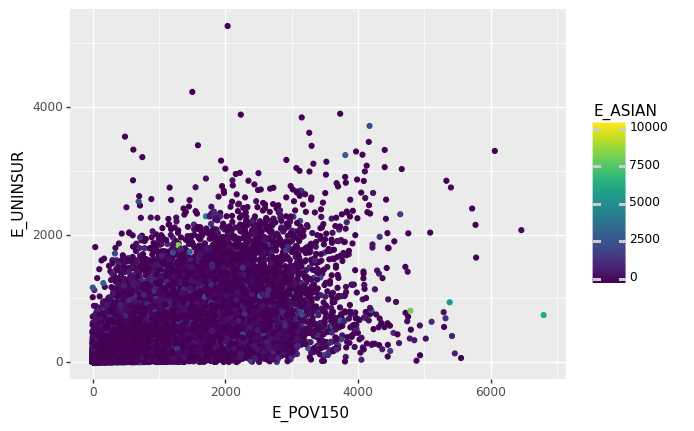

<ggplot: (2982722159815)>

In [21]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR', color='E_ASIAN')) + pn.geom_point()

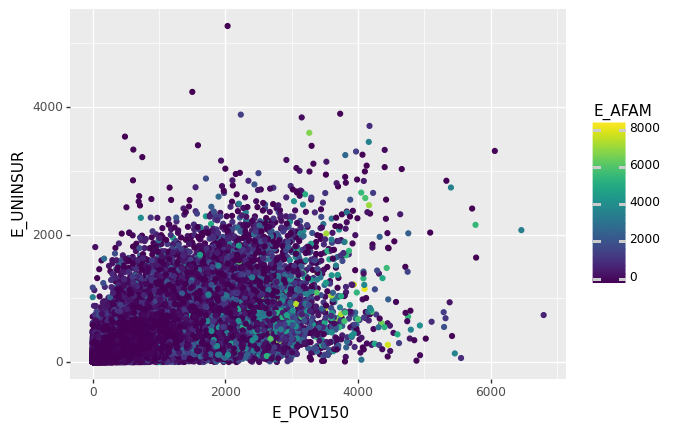

<ggplot: (2982722167397)>

In [22]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR', color='E_AFAM')) + pn.geom_point()

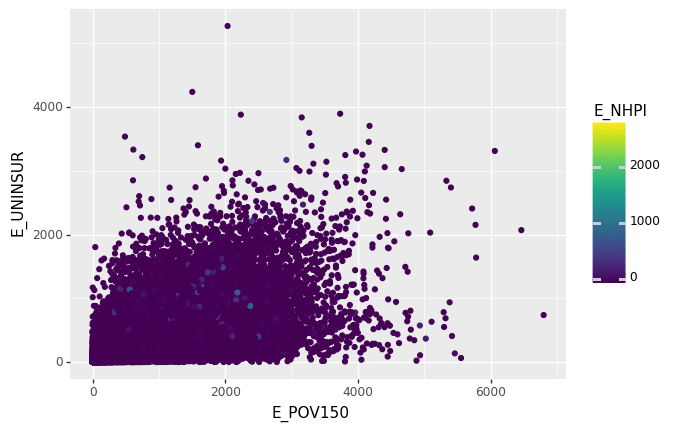

<ggplot: (2982722887677)>

In [23]:
pn.ggplot(df, pn.aes(x='E_POV150', y='E_UNINSUR', color='E_NHPI')) + pn.geom_point()

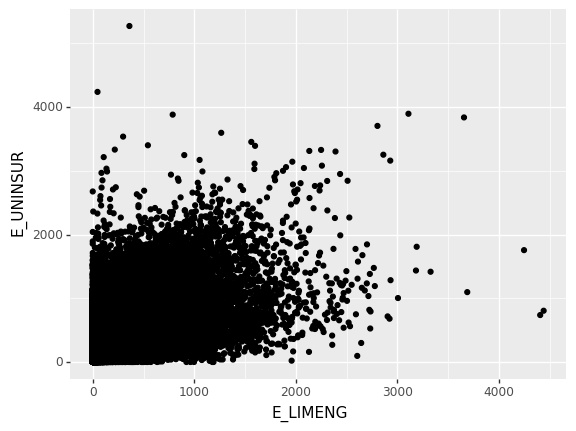

<ggplot: (2982724318578)>

In [24]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR')) + pn.geom_point()

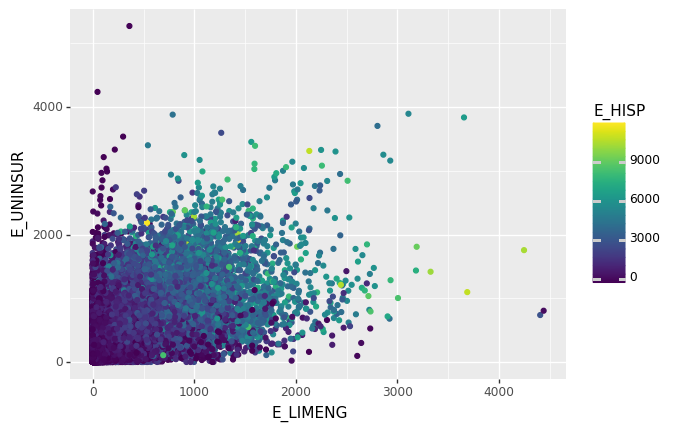

<ggplot: (2982724581479)>

In [26]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR', color='E_HISP')) + pn.geom_point()

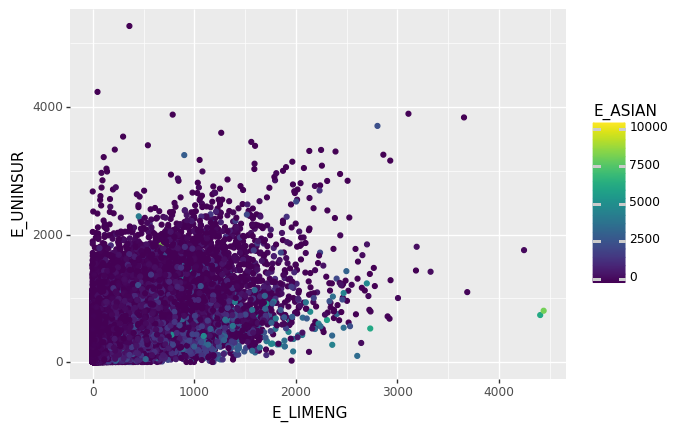

<ggplot: (2982724627081)>

In [27]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR', color='E_ASIAN')) + pn.geom_point()

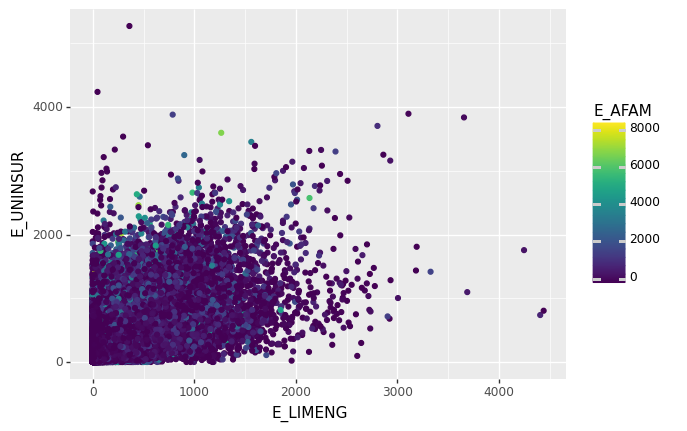

<ggplot: (2982724916471)>

In [28]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR', color='E_AFAM')) + pn.geom_point()

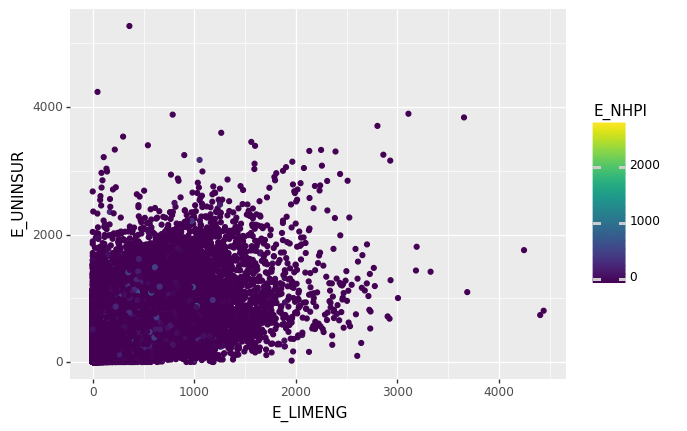

<ggplot: (2982724889931)>

In [29]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR', color='E_NHPI')) + pn.geom_point()

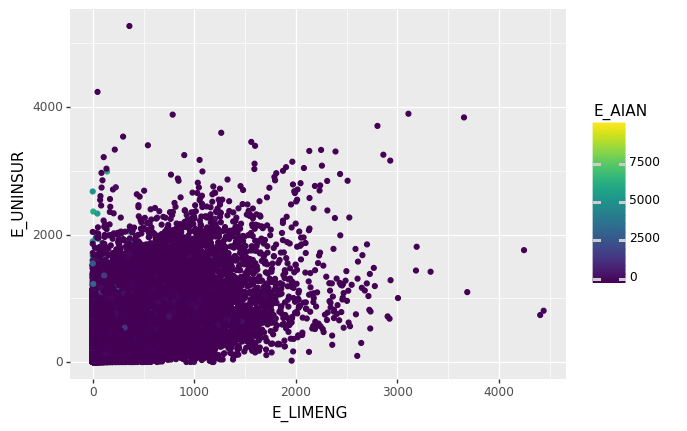

<ggplot: (2982724735352)>

In [30]:
pn.ggplot(df, pn.aes(x='E_LIMENG', y='E_UNINSUR', color='E_AIAN')) + pn.geom_point()

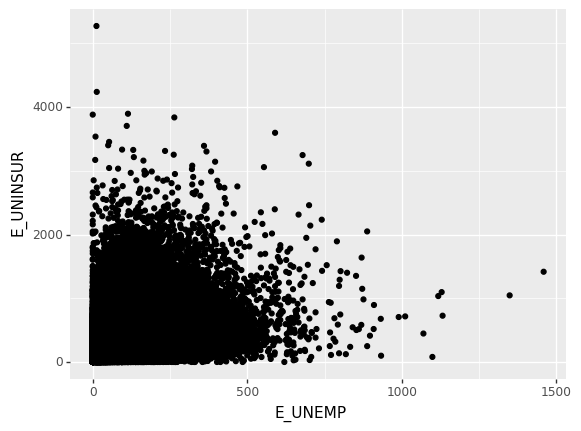

<ggplot: (2982724598181)>

In [31]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR')) + pn.geom_point()

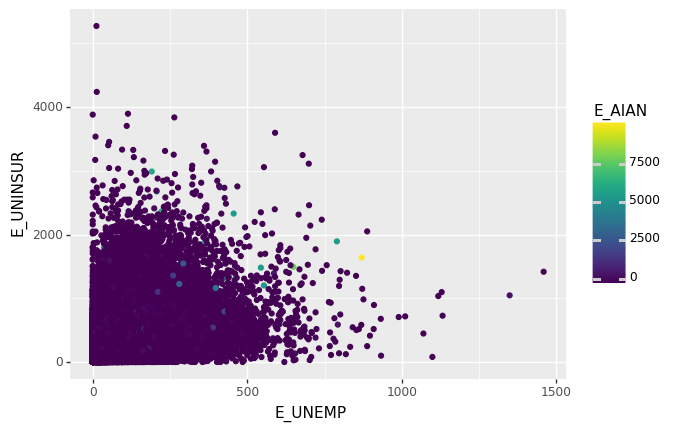

<ggplot: (2982729816605)>

In [33]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR', color='E_AIAN')) + pn.geom_point()

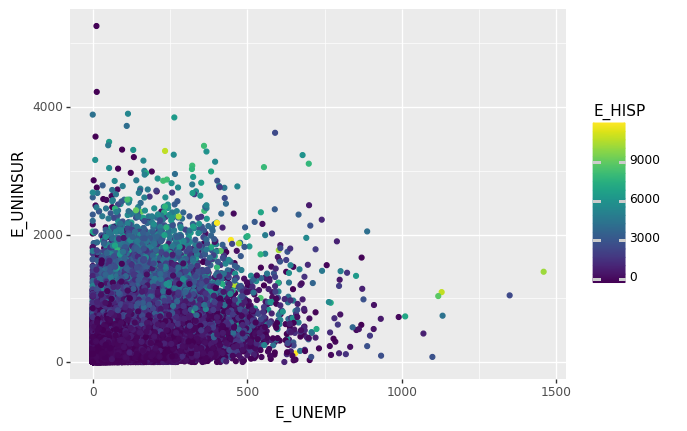

<ggplot: (2982730094896)>

In [34]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR', color='E_HISP')) + pn.geom_point()

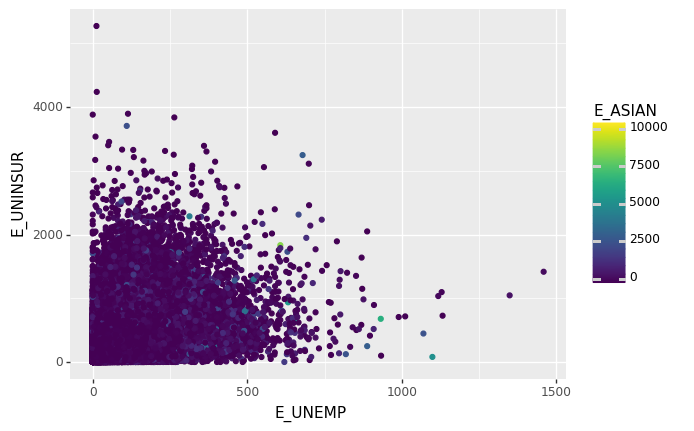

<ggplot: (2982721420337)>

In [35]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR', color='E_ASIAN')) + pn.geom_point()

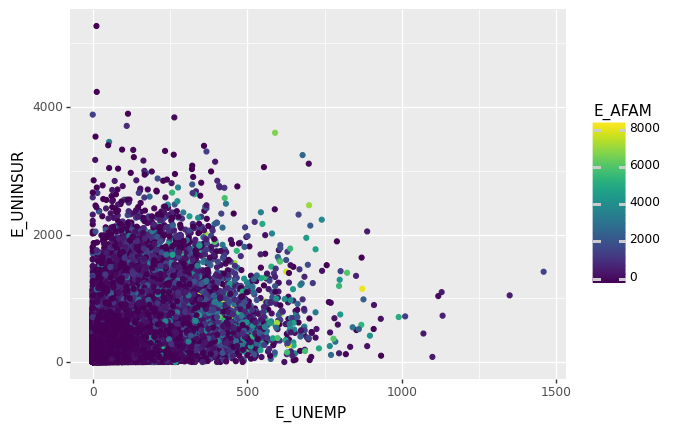

<ggplot: (2982784656198)>

In [36]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR', color='E_AFAM')) + pn.geom_point()

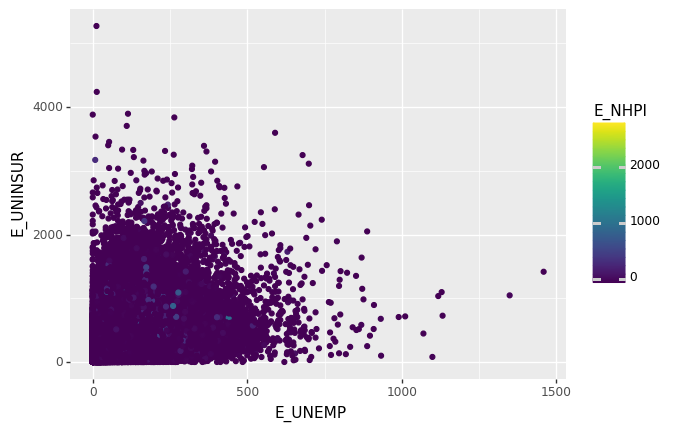

<ggplot: (2982731579987)>

In [37]:
pn.ggplot(df, pn.aes(x='E_UNEMP', y='E_UNINSUR', color='E_NHPI')) + pn.geom_point()

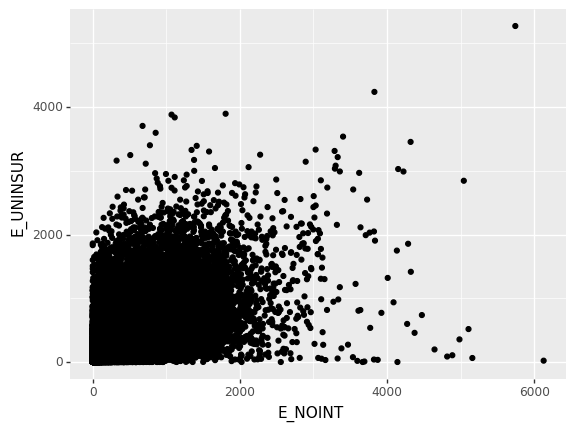

<ggplot: (2982809279212)>

In [72]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR')) + pn.geom_point()

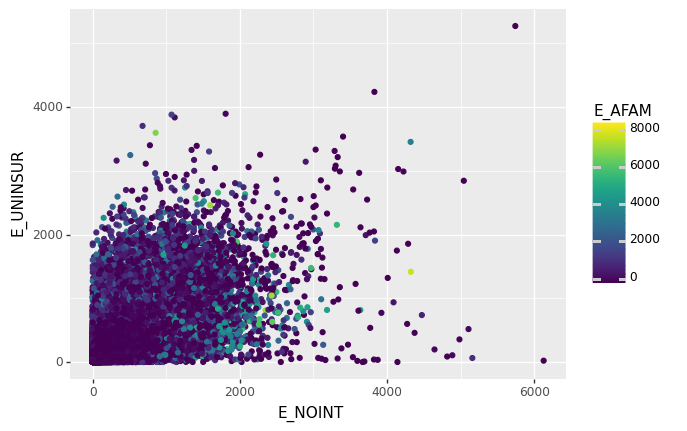

<ggplot: (2982636405436)>

In [70]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR', color='E_AFAM')) + pn.geom_point()

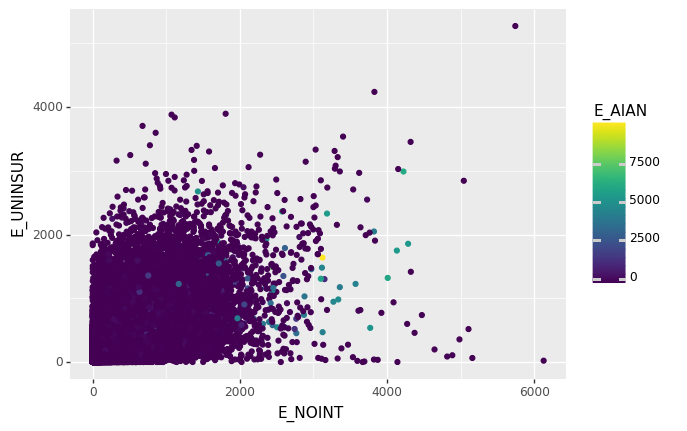

<ggplot: (2982636881380)>

In [66]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR', color='E_AIAN')) + pn.geom_point()

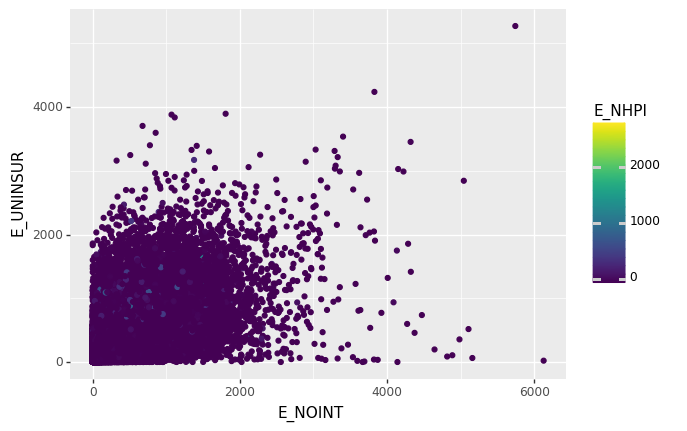

<ggplot: (2982637682965)>

In [68]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR', color='E_NHPI')) + pn.geom_point()

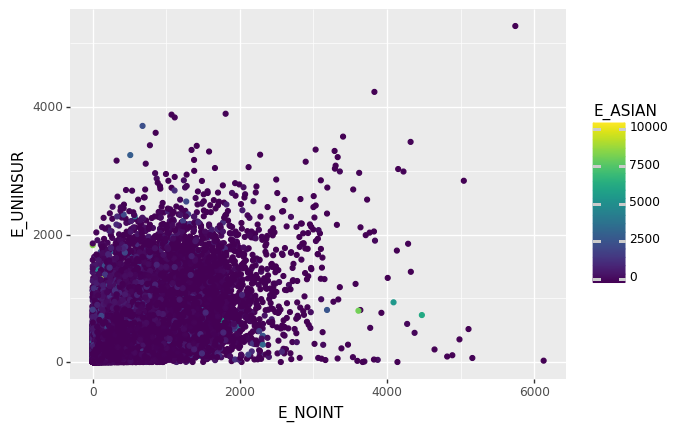

<ggplot: (2982637607285)>

In [69]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR', color='E_ASIAN')) + pn.geom_point()

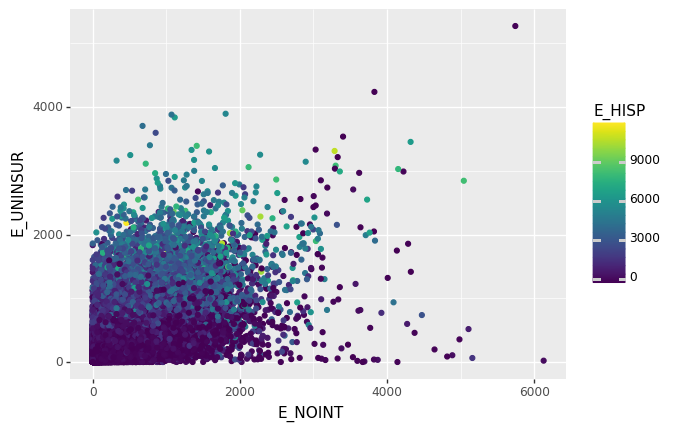

<ggplot: (2982796839985)>

In [49]:
pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR', color='E_HISP')) + pn.geom_point()

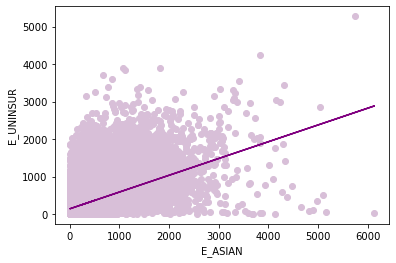

R-squared: 0.24860876652631791


In [73]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_NOINT'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_ASIAN')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

Linear predictions: [[236.42903001]
 [274.02404262]
 [318.78001   ]
 ...
 [233.74367197]
 [375.62008859]
 [370.69693217]]


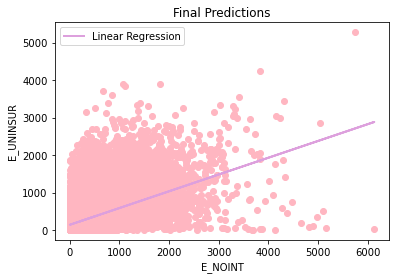

In [51]:
# train the models
model = LinearRegression()
model.fit(X, y)

# final predictions with  trained models
final_predictions_model = model.predict(X)

# print it out please 
print('Linear predictions:', final_predictions_model)                                        

# plot predicted values from linear regression model
plt.plot(X, final_predictions_model, color='plum', linewidth=2, label='Linear Regression')

# add labels and legend
plt.scatter(X, y, color='lightpink')
plt.xlabel('E_NOINT')
plt.ylabel('E_UNINSUR')
plt.title('Final Predictions')
plt.legend()

# show plot
plt.show()

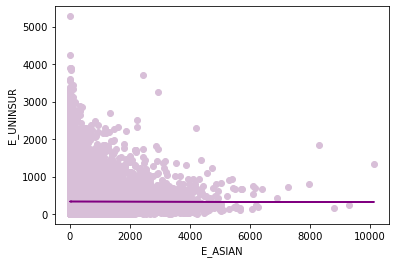

R-squared: 2.8429758495152058e-06


In [64]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_ASIAN'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_ASIAN')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

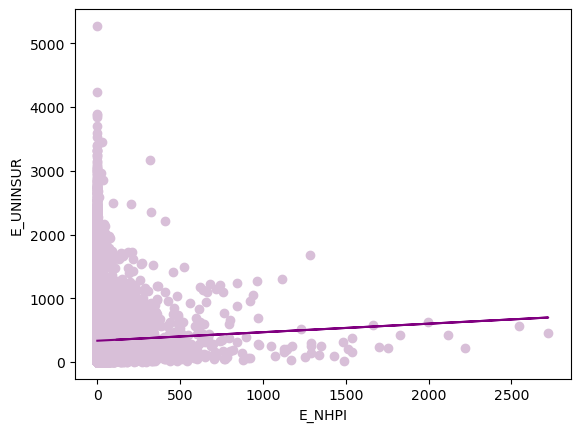

R-squared: 0.0003572966641210984


In [15]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_NHPI'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_NHPI')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

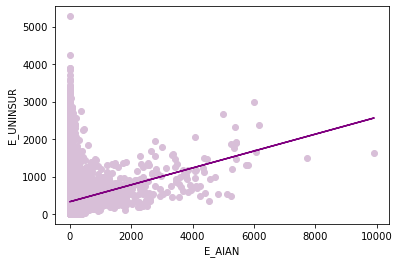

R-squared: 0.012119039581009683


In [60]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_AIAN'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_AIAN')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

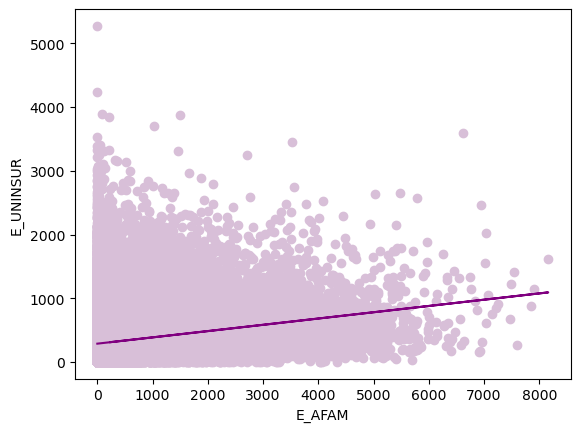

R-squared: 0.05541427133734622


In [14]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_AFAM'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_AFAM')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

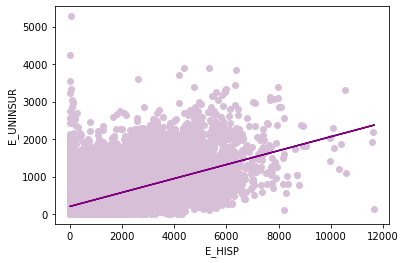

R-squared: 0.3448419125262723


In [61]:
# now let's see a simple linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df['E_HISP'].values.reshape(-1, 1)  # independent variable
y = df['E_UNINSUR'].values.reshape(-1, 1)  # dependent variable

# defining the model
model = LinearRegression()
model.fit(X, y)

# predict with the model
y_pred = model.predict(X)

# plotting the data and regression
plt.scatter(X, y, color='thistle')
plt.ylabel('E_UNINSUR')
plt.xlabel('E_HISP')
plt.plot(X, y_pred, color='purple')
plt.show()

# regression R^2
r_squared = model.score(X, y)
print("R-squared:", r_squared)

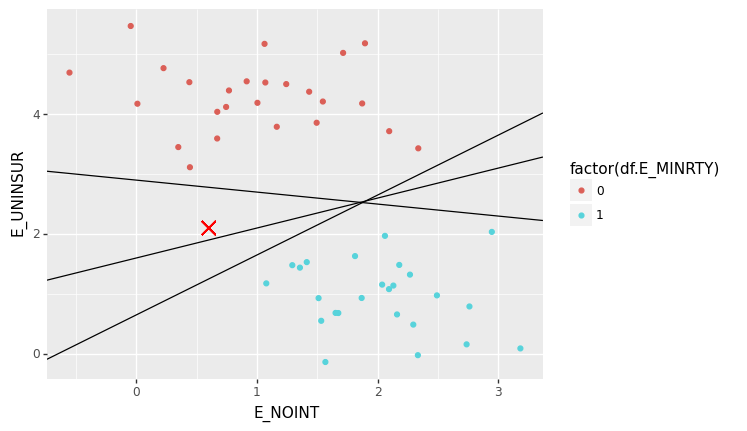

<ggplot: (2959392376019)>

In [7]:
from scipy import stats

from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import fetch_lfw_people

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits import mplot3d

# I did change some plots to use plotnine
import plotnine as pn

# Creat some data:
#   X is a 2D-ndarray with x,y coordinates
#   y is 1/0 categorical value for each X
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Convert to dataframe for pn
df=pd.DataFrame({'E_NOINT':X[:,0], 'E_UNINSUR':X[:,1], 'E_MINRTY':y } )

pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR')) + pn.geom_point(pn.aes(color='factor(df.E_MINRTY)'))

( pn.ggplot(df, pn.aes(x='E_NOINT', y='E_UNINSUR')) + pn.geom_point(pn.aes(color='factor(df.E_MINRTY)')) + 
  pn.geom_abline(pn.aes(slope=1, intercept=0.65))+ pn.geom_abline(pn.aes(slope=0.5, intercept=1.6))+ 
  pn.geom_abline(pn.aes(slope=-0.2, intercept=2.9)) + 
  pn.geom_point(pn.aes(x=0.6, y=2.1), color='red', shape='x', size=5) )

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto'],
}

# Create the SVM model
svc = SVC()

# Create the PCA object
pca = PCA()

# Create the pipeline object
pipeline = Pipeline([('pca', pca), ('svc', svc)])

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Validation score: {grid_search.best_score_:.3f}")

Best hyperparameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Validation score: 1.000
